## 2D FFTs

In pyqg, the wavenumbers are restricted to only half the plane for one of the axes. Pavel said this is because for a real valued signal, one half of the plane is the complex conjugate of the other, and so can be discarded. Play around with this.

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
ds=xr.load_dataset("/scratch/cp3759/pyqg_data/sims/rollouts/rollout_BScat_252.nc")

In [25]:
p1=ds.p[5000][0]
p2=ds.p[5000][1]

q1=ds.q[5000][0]
q2=ds.q[5000][1]

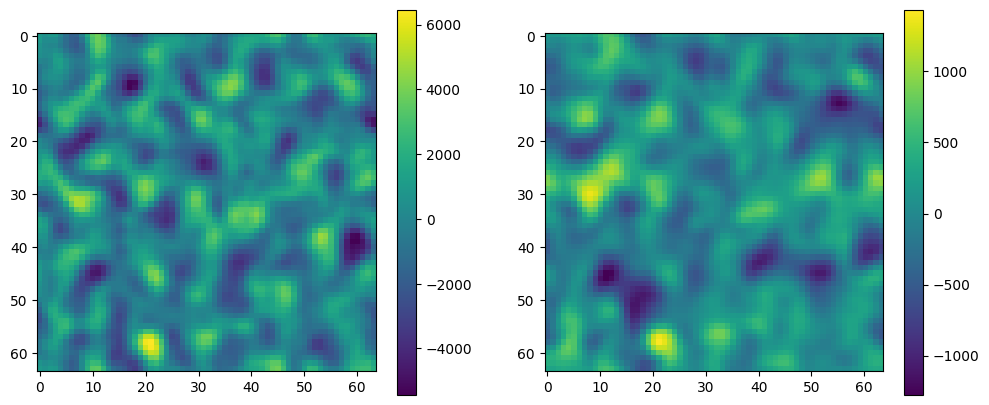

In [4]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
im1=ax1.imshow(p1)
fig.colorbar(im1,ax=ax1,orientation='vertical')
im2=ax2.imshow(p2)
fig.colorbar(im2,ax=ax2,orientation='vertical')
#ax2.colorbar()

In [6]:
p1_fft=np.fft.rfftn(p1)
p2_fft=np.fft.rfftn(p2)

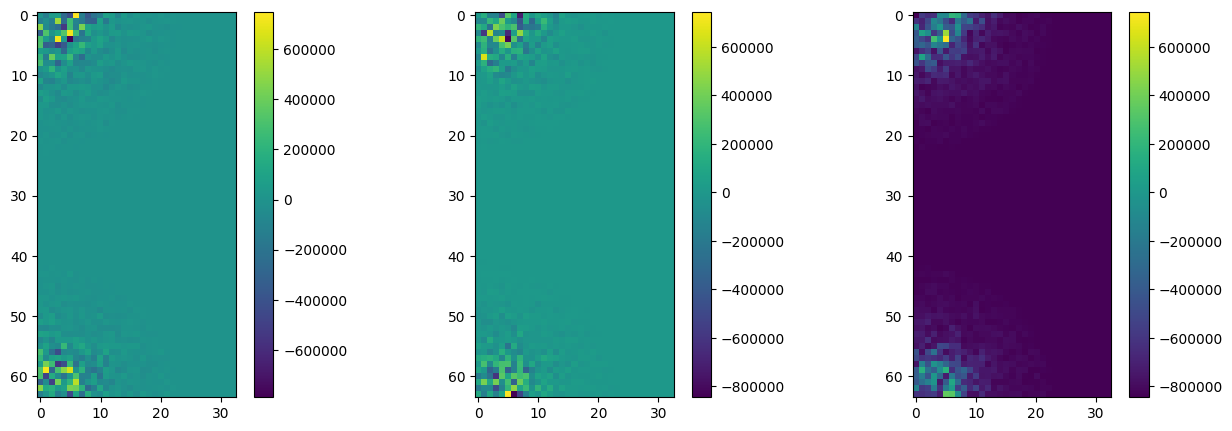

In [8]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,5))
im1=ax1.imshow(p1_fft.real)
fig.colorbar(im1,ax=ax1,orientation='vertical')
im2=ax2.imshow(p1_fft.imag)
fig.colorbar(im2,ax=ax2,orientation='vertical')
im3=ax3.imshow(np.abs(p1_fft))
fig.colorbar(im2,ax=ax3,orientation='vertical')

In [9]:
## Now reconstruct
p1_re=np.fft.irfftn(p1_fft)
p2_re=np.fft.irfftn(p2_fft)

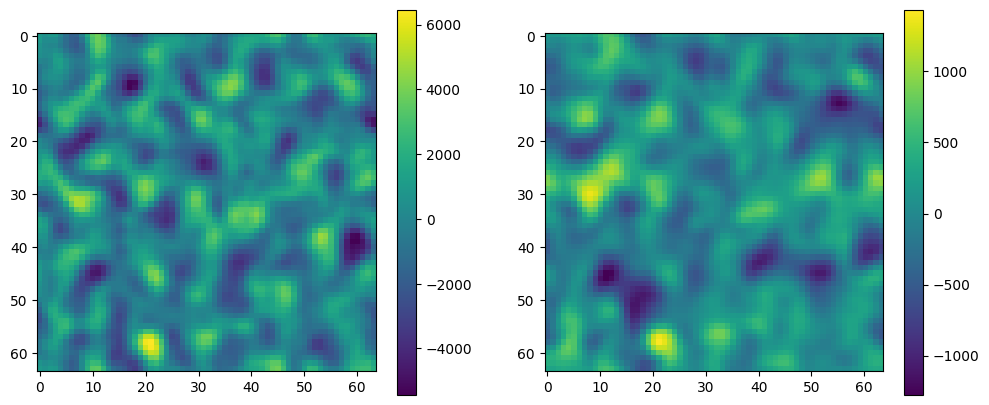

In [10]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
im1=ax1.imshow(p1_re.real)
fig.colorbar(im1,ax=ax1,orientation='vertical')
im2=ax2.imshow(p2_re.real)
fig.colorbar(im2,ax=ax2,orientation='vertical')

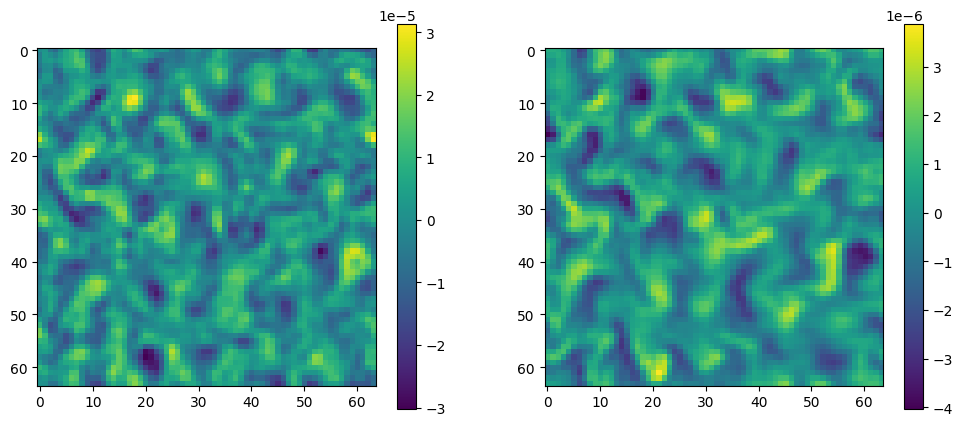

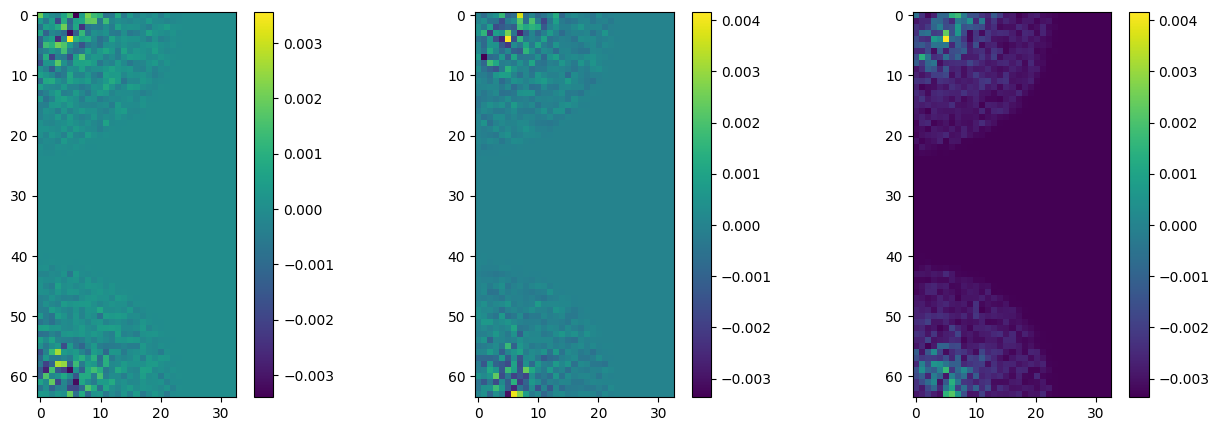

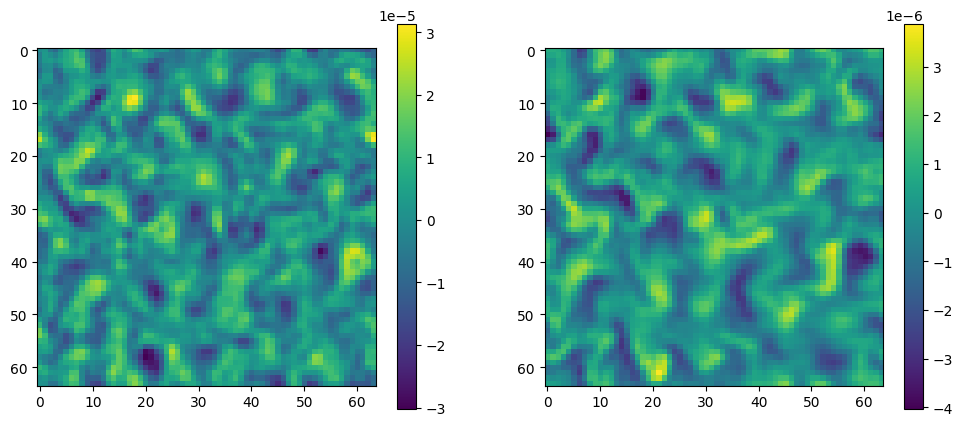

In [26]:
## Now do same with q

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
im1=ax1.imshow(q1)
fig.colorbar(im1,ax=ax1,orientation='vertical')
im2=ax2.imshow(q2)
fig.colorbar(im2,ax=ax2,orientation='vertical')

q1_fft=np.fft.rfftn(q1)
q2_fft=np.fft.rfftn(q2)

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,5))
im1=ax1.imshow(q1_fft.real)
fig.colorbar(im1,ax=ax1,orientation='vertical')
im2=ax2.imshow(q1_fft.imag)
fig.colorbar(im2,ax=ax2,orientation='vertical')
im3=ax3.imshow(np.abs(q1_fft))
fig.colorbar(im2,ax=ax3,orientation='vertical')

## Now reconstruct
q1_re=np.fft.irfftn(q1_fft)
q2_re=np.fft.irfftn(q2_fft)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
im1=ax1.imshow(q1_re.real)
fig.colorbar(im1,ax=ax1,orientation='vertical')
im2=ax2.imshow(q2_re.real)
fig.colorbar(im2,ax=ax2,orientation='vertical')

In [28]:
## Get F1 and F2
F1=3.5555555555555554e-09
F2=8.888888888888889e-10

In [17]:
nx=64
ny=64
L=1e6
W=L

nl = ny
nk = nx/2 + 1

In [18]:
x,y = np.meshgrid(
    np.arange(0.5,nx,1.)/nx*L,
    np.arange(0.5,ny,1.)/ny*W )

# Notice: at xi=1 U=beta*rd^2 = c for xi>1 => U>c
# wavenumber one (equals to dkx/dky)
dk = 2.*math.pi/L
dl = 2.*math.pi/W

# wavenumber grids
# set in kernel
ll = dl*np.append( np.arange(0.,nx/2),
    np.arange(-nx/2,0.) )
kk = dk*np.arange(0.,nk)

k, l = np.meshgrid(kk, ll)
ik = 1j*k
il = 1j*l
# physical grid spacing
dx = L / nx
dy = W / ny

In [30]:
## Calculate determinants
w2=l**2+k**2

In [71]:
k.shape

(64, 33)

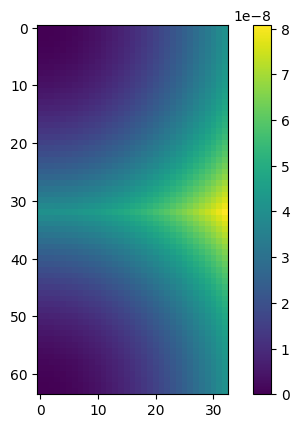

In [33]:
plt.imshow(w2)
plt.colorbar()

In [36]:
dets=w2*(w2+F1+F2)

In [45]:
ph1=(-(w2+F2)*q1_fft-F1*q2_fft)/dets
#ph2=

/state/partition1/job-39454979/ipykernel_690968/2824186889.py:1: RuntimeWarning: divide by zero encountered in divide
  ph1=(-(w2+F2)*q1_fft-F1*q2_fft)/dets
/state/partition1/job-39454979/ipykernel_690968/2824186889.py:1: RuntimeWarning: invalid value encountered in divide
  ph1=(-(w2+F2)*q1_fft-F1*q2_fft)/dets


In [64]:
ph1[0,0]=3500+0.5j

In [65]:
ph1

array([[ 3.50000000e+03+5.00000000e-01j, -1.29498020e+05+1.52496531e+05j,
         5.31562404e+04-1.41805522e+05j, ...,
        -5.60096102e-06+3.36448326e-04j, -1.90194432e-04+4.72272586e-05j,
        -4.08966507e-04+0.00000000e+00j],
       [-1.19927914e+05-1.17734298e+05j, -2.85666910e+04-1.04069764e+05j,
        -1.24399460e+05+2.07835538e+05j, ...,
         1.86991311e-05+3.00984118e-04j,  2.77880874e-04+2.53088870e-04j,
        -2.81717229e-04+2.26358700e-04j],
       [ 4.73103624e+05+1.92336739e+05j, -5.05958592e+04+1.12204871e+05j,
        -1.62593557e+05-2.42417648e+05j, ...,
         1.34029695e-04+3.64426573e-04j,  5.09080281e-04-9.50498886e-05j,
        -1.09935014e-04-5.76682771e-05j],
       ...,
       [-3.00311905e+05+1.00992644e+05j, -4.08921067e+04+4.14061715e+05j,
        -4.92832635e+05+1.04818910e+05j, ...,
         1.41414085e-04+1.13364380e-05j, -3.63733278e-04+9.99550486e-05j,
        -2.44026828e-04+4.56886100e-04j],
       [ 4.73103624e+05-1.92336739e+05j,  1.

In [66]:
psi_restore=np.fft.irfftn(ph1)

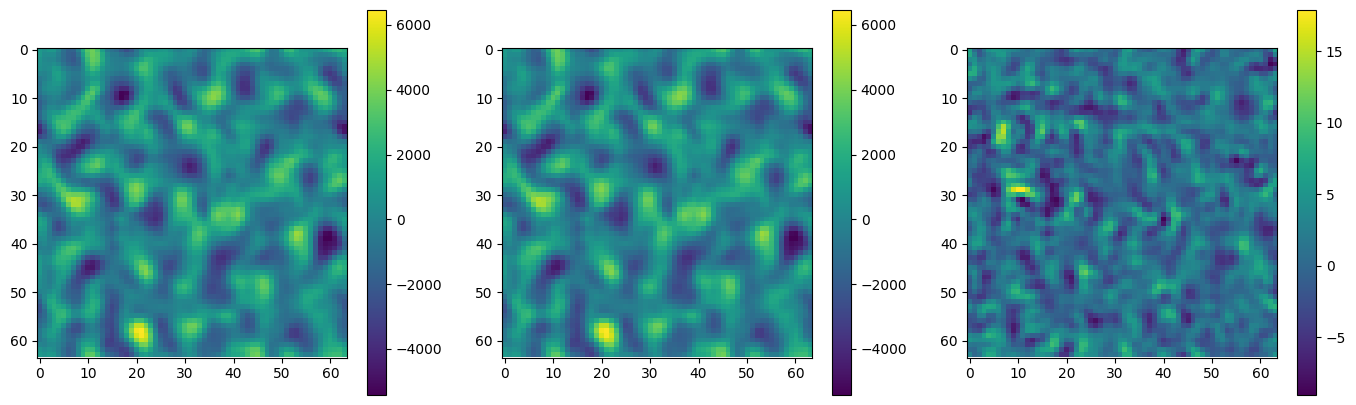

In [67]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(17,5))
im1=ax1.imshow(psi_restore)
fig.colorbar(im1,ax=ax1,orientation='vertical')
im2=ax2.imshow(p1)
fig.colorbar(im2,ax=ax2,orientation='vertical')
im3=ax3.imshow(psi_restore-p1)
fig.colorbar(im3,ax=ax3,orientation='vertical')

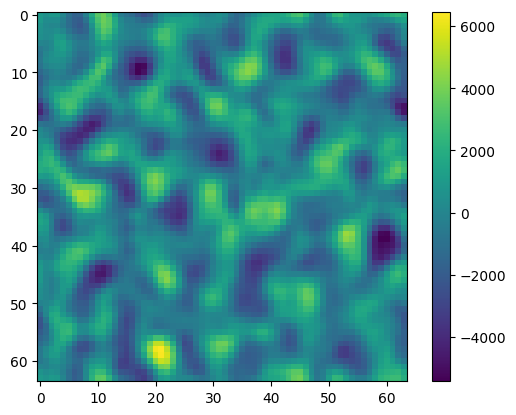

In [51]:
plt.imshow(psi_restore)
plt.colorbar()

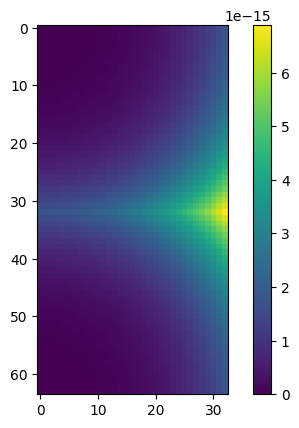

In [37]:
plt.imshow(dets)
plt.colorbar()

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [22]:
ll

array([ 0.00000000e+00,  6.28318531e-06,  1.25663706e-05,  1.88495559e-05,
        2.51327412e-05,  3.14159265e-05,  3.76991118e-05,  4.39822972e-05,
        5.02654825e-05,  5.65486678e-05,  6.28318531e-05,  6.91150384e-05,
        7.53982237e-05,  8.16814090e-05,  8.79645943e-05,  9.42477796e-05,
        1.00530965e-04,  1.06814150e-04,  1.13097336e-04,  1.19380521e-04,
        1.25663706e-04,  1.31946891e-04,  1.38230077e-04,  1.44513262e-04,
        1.50796447e-04,  1.57079633e-04,  1.63362818e-04,  1.69646003e-04,
        1.75929189e-04,  1.82212374e-04,  1.88495559e-04,  1.94778745e-04,
       -2.01061930e-04, -1.94778745e-04, -1.88495559e-04, -1.82212374e-04,
       -1.75929189e-04, -1.69646003e-04, -1.63362818e-04, -1.57079633e-04,
       -1.50796447e-04, -1.44513262e-04, -1.38230077e-04, -1.31946891e-04,
       -1.25663706e-04, -1.19380521e-04, -1.13097336e-04, -1.06814150e-04,
       -1.00530965e-04, -9.42477796e-05, -8.79645943e-05, -8.16814090e-05,
       -7.53982237e-05, -

In [23]:
l

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.28318531e-06,  6.28318531e-06,  6.28318531e-06, ...,
         6.28318531e-06,  6.28318531e-06,  6.28318531e-06],
       [ 1.25663706e-05,  1.25663706e-05,  1.25663706e-05, ...,
         1.25663706e-05,  1.25663706e-05,  1.25663706e-05],
       ...,
       [-1.88495559e-05, -1.88495559e-05, -1.88495559e-05, ...,
        -1.88495559e-05, -1.88495559e-05, -1.88495559e-05],
       [-1.25663706e-05, -1.25663706e-05, -1.25663706e-05, ...,
        -1.25663706e-05, -1.25663706e-05, -1.25663706e-05],
       [-6.28318531e-06, -6.28318531e-06, -6.28318531e-06, ...,
        -6.28318531e-06, -6.28318531e-06, -6.28318531e-06]])

In [24]:
kk

array([0.00000000e+00, 6.28318531e-06, 1.25663706e-05, 1.88495559e-05,
       2.51327412e-05, 3.14159265e-05, 3.76991118e-05, 4.39822972e-05,
       5.02654825e-05, 5.65486678e-05, 6.28318531e-05, 6.91150384e-05,
       7.53982237e-05, 8.16814090e-05, 8.79645943e-05, 9.42477796e-05,
       1.00530965e-04, 1.06814150e-04, 1.13097336e-04, 1.19380521e-04,
       1.25663706e-04, 1.31946891e-04, 1.38230077e-04, 1.44513262e-04,
       1.50796447e-04, 1.57079633e-04, 1.63362818e-04, 1.69646003e-04,
       1.75929189e-04, 1.82212374e-04, 1.88495559e-04, 1.94778745e-04,
       2.01061930e-04])

In [12]:
### We just want to get the wavenumber bins

In [13]:
np.fft.fftshift(p1_fft)[32:].real-np.fft.fftshift(p1_fft)[:32].real

array([[ 4.08172607e-04, -5.61594598e-04,  4.23560560e-04, ...,
        -5.58817279e-04,  4.23560559e-04, -5.61594595e-04],
       [ 9.34600830e-05, -2.31268646e-04, -1.18882620e-04, ...,
        -7.78906424e-05, -1.18882620e-04, -2.31268644e-04],
       [ 6.79016113e-04, -5.55725782e-04,  1.18126627e-06, ...,
         6.57752685e-04,  1.18126718e-06, -5.55725780e-04],
       ...,
       [ 2.45094299e-04,  4.25629701e-04, -5.17581907e-04, ...,
         1.73858341e-04, -5.17581908e-04,  4.25629701e-04],
       [ 8.58306885e-06, -2.93807099e-04,  6.74384904e-04, ...,
         1.68158570e-04,  6.74384903e-04, -2.93807100e-04],
       [-3.39031219e-04,  5.55515172e-04, -1.32572545e-05, ...,
        -3.12014544e-04, -1.32572532e-05,  5.55515171e-04]])

In [14]:
np.fft.fftshift(p1_fft)[:,:32].shape

(64, 32)

In [15]:
np.fft.fftshift(p1_fft)[:,32:].shape

(64, 32)

In [16]:
np.fft.fftshift(p1_fft)[:,32:].real-np.fft.fftshift(p1_fft)[:,:32].real

array([[ 20222.19098282, -11392.07014031,   8903.38755148, ...,
         22210.40108747,  -8903.38755148,  11392.07014031],
       [ 14582.94820786, -11168.80667206,  19680.82839802, ...,
         22712.10014115, -19680.82839802,  11168.80667206],
       [ 15300.61683655, -11613.62321424,  27544.29047212, ...,
         18889.01802094, -27544.29047212,  11613.62321424],
       ...,
       [ 48361.18792725,   3619.57396351,   1433.99365532, ...,
        -18458.74916506,  -1433.99365532,  -3619.57396351],
       [ 50944.31636047,  -1386.97376413,  -4387.3907284 , ...,
          2546.18175743,   4387.3907284 ,   1386.97376413],
       [ 37358.83454895,  -7617.60152381,   -985.19685145, ...,
         15476.41590998,    985.19685145,   7617.60152381]])

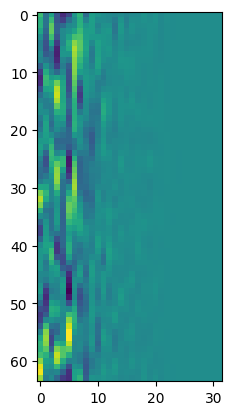

In [17]:
plt.imshow(np.fft.fftshift(p1_fft)[:,32:].real)

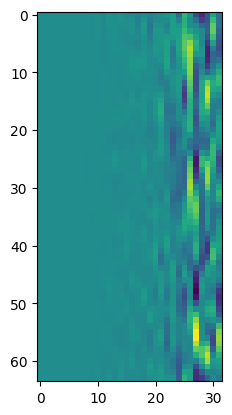

In [18]:
plt.imshow(np.fft.fftshift(p1_fft)[:,:32].real)

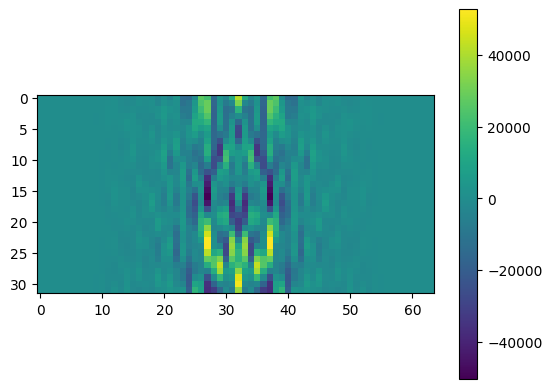

In [19]:
plt.imshow(np.fft.fftshift(p1_fft)[32:].real)
plt.colorbar()

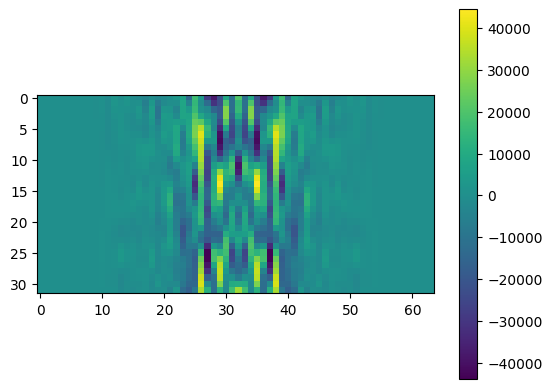

In [20]:
plt.imshow(np.fft.fftshift(p1_fft)[:32].real)
plt.colorbar()

In [21]:
import math

In [22]:
L=1e6
W=L
nx=64

nk=(nx // 2) + 1

# Compute inversion matrix
dk = 2 * math.pi / L
dl = 2 * math.pi / W
ll = dl * np.concatenate(
    [
        np.arange(0, nx / 2, dtype=np.float64),
        np.arange(-nx / 2, 0, dtype=np.float64),
    ]
)
kk = dk * np.arange(0, nk, dtype=np.float64)
k, l = np.meshgrid(kk, ll)
wv2 = k**2 + l**2

In [24]:
wv2.shape

(64, 33)

In [26]:
F1=0.2
F2=0.3

In [27]:
inv_mat2 = np.moveaxis(
    np.array(
        [
            [
                # 0, 0
                -(wv2 + F1),
                # 0, 1
                np.full_like(wv2, F1),
            ],
            [
                # 1, 0
                np.full_like(wv2, F2),
                # 1, 1
                -(wv2 + F2),
            ],
        ]
    ),
    (0, 1),
    (-2, -1),
).reshape((-1, 2, 2))[1:]

In [28]:
inv_mat2.shape

(2111, 2, 2)

In [34]:
2111/63

33.507936507936506